<a href="https://colab.research.google.com/github/cydal/DETR_Finetuning/blob/main/DETR_Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install torchvision==0.6

     |████████████████████████████████| 6.6 MB 10.1 MB/s 
     |████████████████████████████████| 752.0 MB 10 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.0 which is incompatible.


In [ ]:
import torch, torchvision

In [ ]:
! rm -r /content/VIA2COCO
! rm -r /content/detr 
! rm -r /content/data

rm: cannot remove '/content/VIA2COCO': No such file or directory
rm: cannot remove '/content/detr': No such file or directory
rm: cannot remove '/content/data': No such file or directory


In [ ]:
%cd /content/

!rm -rf detr
!git clone https://github.com/woctezuma/detr.git

%cd detr/

!git checkout finetune



%cd /content/

!rm -rf VIA2COCO
!git clone https://github.com/woctezuma/VIA2COCO

%cd VIA2COCO/

! git checkout fixes

# download, decompress the data
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
!unzip balloon_dataset.zip > /dev/null



! git clone https://github.com/cydal/DETR_Finetuning.git
! mv /content/VIA2COCO/DETR_Finetuning/*  /content/VIA2COCO/
! mv /content/VIA2COCO/results.py  /content/detr


/content
Cloning into 'detr'...
remote: Enumerating objects: 239, done.
remote: Total 239 (delta 0), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (239/239), 284.61 KiB | 8.89 MiB/s, done.
Resolving deltas: 100% (131/131), done.
/content/detr
Branch 'finetune' set up to track remote branch 'finetune' from 'origin'.
Switched to a new branch 'finetune'
/content
Cloning into 'VIA2COCO'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 67 (delta 27), reused 38 (delta 20), pack-reused 20
Unpacking objects: 100% (67/67), done.
/content/VIA2COCO
Branch 'fixes' set up to track remote branch 'fixes' from 'origin'.
Switched to a new branch 'fixes'
--2021-08-13 16:25:20--  https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP reques

In [ ]:
% run prep.py

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/checkpoints/detr-r50-e632da11.pth



Converting /content/VIA2COCO/balloon/train/via_region_data.json from VIA format to COCO format
Saving to /content/VIA2COCO/balloon/train/custom_train.json
Converting /content/VIA2COCO/balloon/val/via_region_data.json from VIA format to COCO format
Saving to /content/VIA2COCO/balloon/val/custom_val.json
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Categories: ['balloon']
Super-categories: {'N/A'}
Image n°50
Image name: /content/data/custom//train2017/489752654_777853a0ba_b.jpg


In [ ]:
%cd /content/detr/

! python main.py \
  --dataset_file "custom" \
  --coco_path "/content/data/custom/" \
  --output_dir "outputs" \
  --resume "detr-r50_no-class-head.pth" \
  --num_classes 1 \
  --epochs 100

/content/detr
Not using distributed mode
git:
  sha: e42a3b174d2325c28f82d7114138c755ac7c095a, status: clean, branch: finetune

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='/content/data/custom/', dataset_file='custom', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=100, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=1, num_queries=100, num_workers=2, output_dir='outputs', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='detr-r50_no-class-head.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
number of params: 41279238
loading annotations into memory...
Done (t=0.01s)
crea

Using cache found in /root/.cache/torch/hub/facebookresearch_detr_master


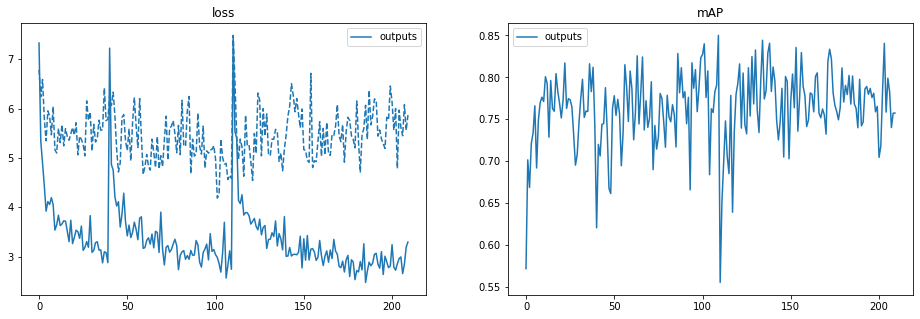

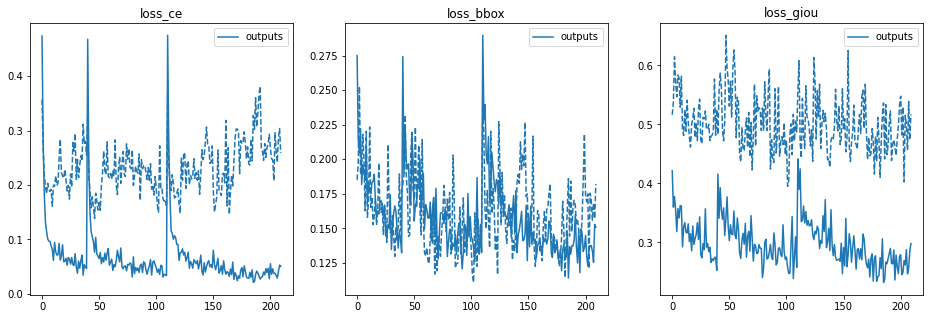

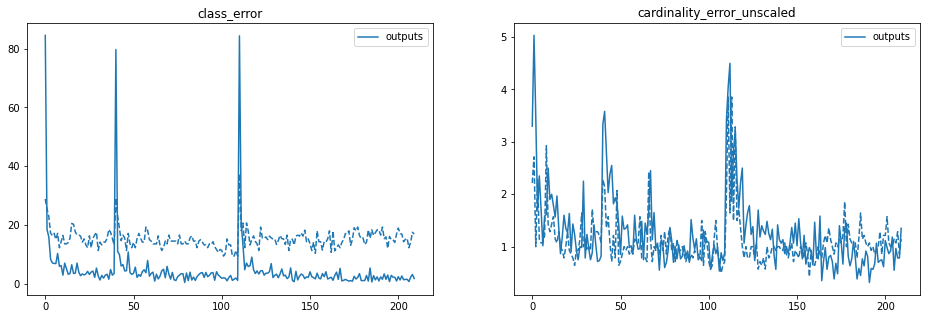

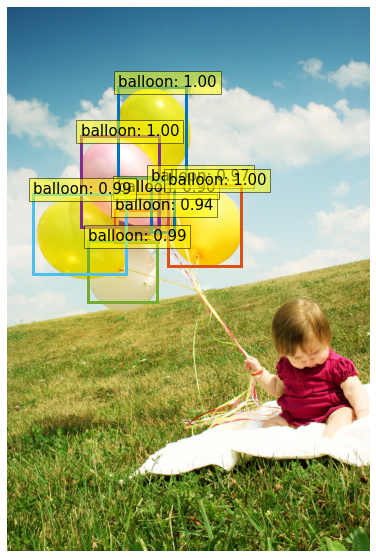

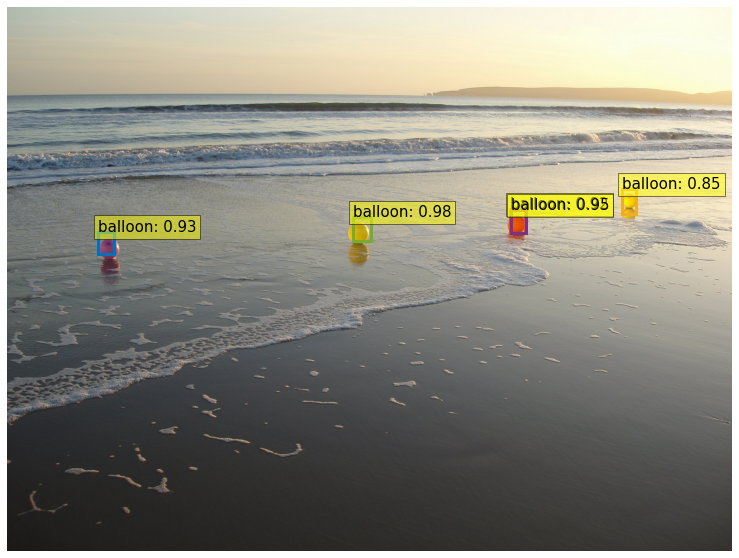

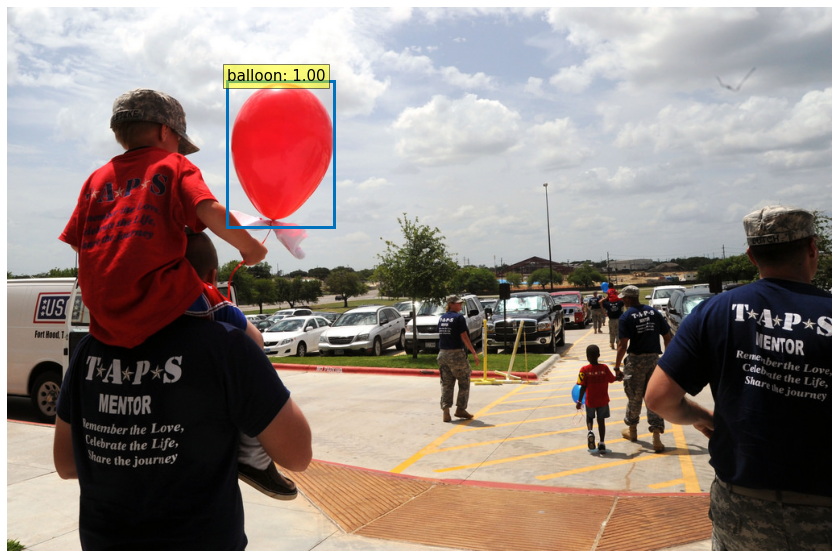

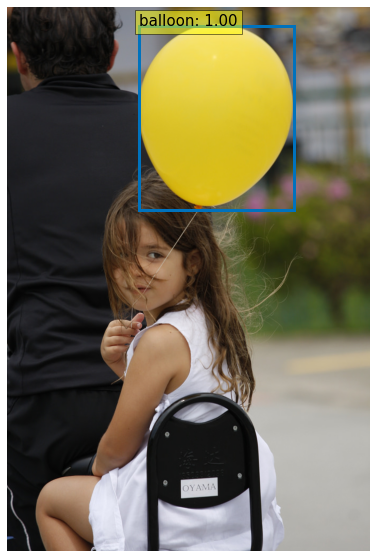

<Figure size 720x576 with 0 Axes>

In [ ]:
% run results.py

In [ ]:
size = [180, 200, 300, 400]

In [ ]:
size[2:]

[300, 400]

In [ ]:
size[::-2]

[400, 200]